In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.cm as cm
import seaborn as sns
import itertools
import re
import time
import math
import json

from collections import Counter

sns.set(style="white", color_codes=True,font_scale=1.2)
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from functions_utils import *

For this video (6.4), we define the following slide changes :

In [3]:
slide_change = [-1,23,98,173,336,632,698,786,860,1099,1147]
slide_change_slots = [time_to_slot(x) for x in slide_change]
slide_change_slots

[-1, 4, 19, 34, 67, 126, 139, 157, 172, 219, 229]

## Video e7b1fb5f37b24370b5f7e58e3c31896e

In [4]:
video_path = 'Videos/e7b1fb5f37b24370b5f7e58e3c31896e/'
video_bundle = 'EPFLx-BIO465.1x-4T2014'
video_name = 'e7b1fb5f37b24370b5f7e58e3c31896e'
slides_timestamp = '00:00:18,268 00:01:20,138 00:01:56,298 00:02:04,021 00:02:40,580 00:02:49,538 00:03:14,580 00:03:27,895 00:04:35,824 00:05:35,510 00:05:59,528 00:06:27,592 00:07:42,000'

# video_path = 'Videos/spc-4.2/'
# video_bundle = 'EPFLx-BIO465.1x-4T2014'
# video_name = 'spc-4.2'
# slides_timestamp = "00:00:06,007 00:00:13,436 00:01:13,646 00:02:53,043 00:04:02,206 00:05:26,055 00:05:48,615 00:06:25,379 00:06:49,570 00:10:14,343 00:12:37,714 00:14:24,677 00:17:42,449 00:18:46,374 00:19:02,974 00:20:55,517 00:22:04,505 00:24:01,413 00:24:10,000"
# slides_timestamp = "00:00:00,000 00:00:06,007 00:00:13,436 00:01:13,646 00:02:53,043 00:04:02,206 00:05:26,055 00:05:48,615 00:06:25,379 00:06:49,570 00:10:14,343 00:12:37,714 00:14:24,677 00:17:42,449 00:18:46,374 00:19:02,974 00:20:55,517 00:22:04,505 00:24:01,413 00:24:10,000"

In [6]:
# df_views = pd.read_csv(video_path + video_bundle + '___' + video_name + '.csv')
# df_views.drop(['created'], axis=1, inplace=True)
# df_views['seconds'] = df_views.segment*5

In [7]:
slides_changes = time_to_seconds(slides_timestamp)
slides_changes_slots = sorted(list(set([time_to_slot(x) for x in slides_changes])))

In [8]:
slides_changes

beginning = 0
end = max(slides_changes)
length_bar = 640
ratio_slide_timestamp = []
# for x in range(1,len(slides_changes)) :
#     start = 0 if x-1 == 0 else slides_changes[x-1]*length_bar/end
#     finish = slides_changes[x]*length_bar/end
#     ratio_slide_timestamp.append((start,finish))
for x in slides_changes :
    ts = 0 if x < 0 else x
    ratio_slide_timestamp.append(np.round(ts*length_bar/end*2)/2)
ratio_slide_timestamp
size_slide = {}
for x in range(1,len(ratio_slide_timestamp)) :
    size_slide[x-1] = [ratio_slide_timestamp[x-1],ratio_slide_timestamp[x]-ratio_slide_timestamp[x-1],
                       length_bar-ratio_slide_timestamp[x]]
size_slide

{0: [0.0, 25.5, 614.5],
 1: [25.5, 85.5, 529.0],
 2: [111.0, 50.0, 479.0],
 3: [161.0, 11.0, 468.0],
 4: [172.0, 50.5, 417.5],
 5: [222.5, 12.5, 405.0],
 6: [235.0, 34.5, 370.5],
 7: [269.5, 18.5, 352.0],
 8: [288.0, 94.0, 258.0],
 9: [382.0, 83.0, 175.0],
 10: [465.0, 33.0, 142.0],
 11: [498.0, 39.0, 103.0],
 12: [537.0, 103.0, 0.0]}

In [9]:
# finish_time = np.round(max(slides_changes)-1)
# df_views = fill_missing_range(df_views,'seconds',0,finish_time, fill_with=np.nan)
# df_views.num_users = df_views.num_users.interpolate()
# df_views.num_views = df_views.num_views.interpolate()
# df_views.segment = df_views.segment.interpolate()
# df_views['num_replays'] = df_views['num_views'] - df_views['num_users']
# df_views['ratio_replays'] = df_views['num_replays'] / df_views['num_views']*50
# slot_maximum = max(df_views['segment'].values)
# max_viewers = max(df_views['num_views'].values)
# df_views['slide'] = pd.cut(df_views['seconds'], slides_changes, labels=[x for x in range(0,len(slides_changes)-1)])
# #TODO 
# #Make categorical index -> int 
# df_views.to_csv('temp.csv')
# df_views = pd.read_csv('temp.csv')

# df_slide_views = df_views.groupby('slide').agg({'num_views':'max', 'num_users':'max','num_replays':'max'}).copy()
# df_slide_views.rename(index=str, columns={'num_users':'num_users_max', 'num_views':'num_views_max',
#                                               'num_replays':'num_replays_max'}, inplace=True)
# df_slide_views

In [10]:
# peak_number = 12

# # Choice of slide separation

# #slides_changes = slide_detection(df_slides,peak_number,slot_maximum)
# #slides_changes = slide_linear(df_slides,peak_number,slot_maximum)

# string = '00:00:18,268 00:01:20,138 00:01:56,298 00:02:04,021 00:02:40,580 00:02:49,538 00:03:14,580 00:03:27,895 00:04:35,824 00:05:35,510 00:05:59,528 00:06:27,592 00:07:42,000'
# slides_changes = time_to_seconds(string)
# slides_changes_slots = sorted(list(set([time_to_slot(x) for x in slides_changes])))

In [11]:
# df_views['slide'] = pd.cut(df_views['seconds'], slides_changes, labels=[x for x in range(0,len(slides_changes)-1)])
# df_views.tail(10)

In [12]:
# fig = plt.figure(figsize=(10,5))
# plt.plot(df_views['segment'], df_views['num_views'], label='views')
# plt.plot(df_views['segment'], df_views['num_users'], label='users')
# plt.plot(df_views['segment'], df_views['num_replays'], label='replays')
# plt.plot(df_views['segment'], df_views['ratio_replays'], label='ratio of replays')
# for x in slides_changes_slots :
#     plt.plot((x, x), (0, 100), 'k-', alpha=0.5)
# plt.ylim([0,100])
# plt.xlim([0,int(df_views.segment.max())-1])
# plt.xticks(range(0,int(df_views.segment.max())-1,12), [sec_to_min(5*x) for x in range(0,int(df_views.segment.max())-1,12)], rotation=-0);
# plt.legend();

Minimum interval to be considered as a Video.Seek : 10 seconds
before :  137
after :  109
Percentage of jumps inside the same slot (cleaned) :  26.6 %
total number of Seeks :  109
total number of Seeks between different slides :  80
to_json : Done


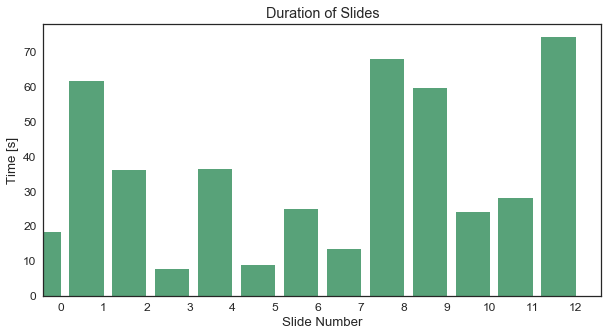

In [23]:
df_click_views_full = pd.read_csv(video_path + video_name + '.csv')

minimal_interval = 10
slides_number = len(slides_changes)-1
intervals = get_interval(slides_changes)
fancy_timestamps = extract_fancy_timestamps(slides_timestamp)

print('Minimum interval to be considered as a Video.Seek : {} seconds'.format(minimal_interval))

# Call of the functions
df_click_views = click_views(df_click_views_full,slides_changes,minimal_interval,intervals)
df_click_views_jump = df_click_views[df_click_views['oldtime_slots'] != df_click_views['newtime_slots']]
#df_click_views_jump = df_click_views.copy()
df_click_views_jump_json = df_click_views[df_click_views['oldtime_slots'] != df_click_views['newtime_slots']]

df_norm, df_norm_clean = to_json(df_click_views,df_click_views_jump_json, 'bio_7_4', size_slide, fancy_timestamps)

# Visualization
# aa = visu_slide_diff(df_click_views_jump,slides_number)
# scatter_slide_diff(aa,df_click_views_jump,slides_number)
# hist_slide_diff(df_click_views_jump,slides_number)
# ratio_incoming = visu_ratios_incoming(df_norm,df_norm_clean)
# aa3 = pause_play(df_click_views_full,slides_changes, 600)
slide_duration(intervals)
# aa1 = visu_slide_views_vs_norm(df_click_views, False)
# aa2 = visu_slide_views_vs_norm(df_click_views, True)
#number_seek_user(df_click_views)
#hist_time_diff(df_click_views)

In [25]:
intervals

{0: 18.368000000000002,
 1: 61.870000000000005,
 2: 36.16,
 3: 7.722999999999999,
 4: 36.55900000000001,
 5: 8.957999999999998,
 6: 25.042,
 7: 13.314999999999998,
 8: 67.929,
 9: 59.68599999999998,
 10: 24.01800000000003,
 11: 28.063999999999965,
 12: 74.40800000000002}

In [22]:
df_norm

,source,target,value,source_interval_length,target_interval_length,value_norm
0,source 0,target 1,6,18.368,61.870,0.375000
1,source 0,target 11,1,18.368,28.064,0.100000
2,source 0,target 2,3,18.368,36.160,0.300000
3,source 0,target 3,1,18.368,7.723,0.333333
4,source 0,target 4,4,18.368,36.559,0.285714
5,source 0,target 5,1,18.368,8.958,0.200000
6,source 0,target 8,2,18.368,67.929,0.125000
7,source 1,target 0,2,61.870,18.368,0.285714
8,source 1,target 1,6,61.870,61.870,0.375000
9,source 1,target 2,1,61.870,36.160,0.100000


df_norm, df_norm_clean = to_json(df_click_views,df_click_views_jump_json, 'spc_4_2')

In [15]:
print(len(df_click_views_full))
print(len(df_click_views))
print(len(df_click_views_full)-len(df_click_views))
print(len(df_click_views)/len(df_click_views_full)*100)

2714
109
2605
4.016212232866617


In [16]:
df_click_views_full['diff'] = df_click_views_full['OldTime'] - df_click_views_full['CurrentTime']

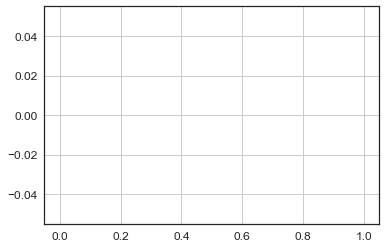

In [17]:
#df_click_views = click_views(df_click_views_full,slides_changes,minimal_interval,intervals)
df_click_views_full = df_click_views_full[df_click_views_full['diff'] < 1]
df_click_views_full = df_click_views_full[df_click_views_full['diff'] > -1]
df_click_views_full['diff'].hist(bins=1000)

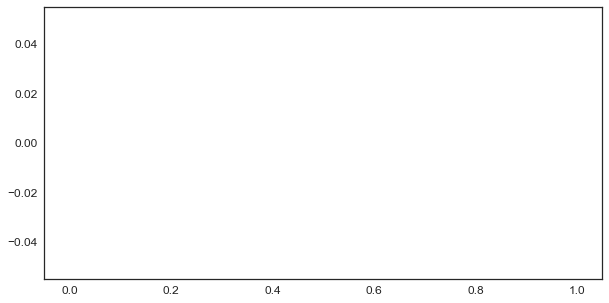

In [18]:
plt.figure(figsize=(10,5))
plt.hist(df_click_views.SessionUserID.value_counts().values, bins=190);

In [19]:
df_to_d3 = df_click_views.groupby(['old_slots','new_slots']).agg({'SessionUserID' : 'count', 'source_interval_length' : 'first','target_interval_length' : 'first'}).copy()
df_to_d3 = df_to_d3.reset_index().rename(index=str, columns={'old_slots': 'source', 'new_slots': 'target', 'SessionUserID' : 'value'})
df_to_d3

,source,target,value,source_interval_length,target_interval_length
0,source 0,target 1,0,18.368,61.870
1,source 0,target 11,0,18.368,28.064
2,source 0,target 2,0,18.368,36.160
3,source 0,target 3,0,18.368,7.723
4,source 0,target 4,0,18.368,36.559
5,source 0,target 5,0,18.368,8.958
6,source 0,target 8,0,18.368,67.929
7,source 1,target 0,0,61.870,18.368
8,source 1,target 1,0,61.870,61.870
9,source 1,target 2,0,61.870,36.160


In [20]:
#aa3 = pause_play(df_click_views_full,slides_changes, 600)
#pd.concat([aa3,aa3.rank(axis=0, method='min', ascending=False)], axis=1)
aa3_ranked = aa3.rank(axis=0, method='min', ascending=False)
ratio_incoming
df_final_raw = pd.concat([aa3,ratio_incoming],axis=1).fillna(0)
df_final = df_final_raw.drop(['pauses_per_user_normalized','total_pauses_normalized','value_source_norm'],axis=1)
df_final_norm = df_final_raw.drop(['pauses_per_user','total_pauses'],axis=1)
df_final_norm
#aa3

NameError: name 'aa3' is not defined

In [ ]:
aa = slide_duration_color(intervals)

In [ ]:
bb = df_final_norm['unique_pausers'].values

In [ ]:
plt.bar(range(0,len(bb)),bb)

In [ ]:
# df_click_views_full.EventType.unique()

# df_click_views_full['slide'] = pd.cut(df_click_views_full['seconds'], slides_changes, labels=[x for x in range(0,len(slides_changes)-1)])

In [ ]:
Counter(df_click_views_full.EventType.values)

In [ ]:
df_click_views_full.columns

In [ ]:
len(df_click_views)